# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-07-06 16:24:35--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   150MB/s    in 0.5s    

2025-07-06 16:24:36 (150 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Load bioactivity data**

In [6]:
! wget https://raw.githubusercontent.com/codingpwincess/data/main/python/Enoyl-\[acyl-carrier-protein\]\ reductase_03_bioactivity_data_curated.csv

--2025-07-06 16:40:43--  https://raw.githubusercontent.com/codingpwincess/data/main/python/Enoyl-[acyl-carrier-protein]%20reductase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-06 16:40:43 ERROR 404: Not Found.



In [4]:
import pandas as pd

In [7]:
df = pd.read_csv('Enoyl-[acyl-carrier-protein] reductase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
...,...,...,...,...
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,50000.0,inactive
369,CHEMBL5430244,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1,4850.0,intermediate
370,CHEMBL5434416,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1,50000.0,inactive
371,CHEMBL5406599,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,1540.0,intermediate


In [8]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [9]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [10]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL217926,10660.0,inactive,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1
1,CHEMBL216547,100000.0,inactive,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1
2,CHEMBL213720,100000.0,inactive,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1
3,CHEMBL217274,100000.0,inactive,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1
4,CHEMBL217773,100000.0,inactive,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1
...,...,...,...,...
368,CHEMBL5398235,50000.0,inactive,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...
369,CHEMBL5430244,4850.0,intermediate,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1
370,CHEMBL5434416,50000.0,inactive,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1
371,CHEMBL5406599,1540.0,intermediate,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [17]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [20]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [21]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,286.375,2.80630,1.0,2.0
1,365.271,3.56880,1.0,2.0
2,344.411,2.57750,1.0,4.0
3,314.429,3.42314,1.0,2.0
4,378.472,4.59860,1.0,3.0
...,...,...,...,...
368,472.430,7.43332,1.0,3.0
369,379.261,5.23502,1.0,4.0
370,412.331,5.01042,2.0,4.0
371,410.359,6.29360,1.0,3.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [22]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,286.375,2.80630,1.0,2.0
1,365.271,3.56880,1.0,2.0
2,344.411,2.57750,1.0,4.0
3,314.429,3.42314,1.0,2.0
4,378.472,4.59860,1.0,3.0
...,...,...,...,...
368,472.430,7.43332,1.0,3.0
369,379.261,5.23502,1.0,4.0
370,412.331,5.01042,2.0,4.0
371,410.359,6.29360,1.0,3.0


In [23]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive
...,...,...,...,...
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,50000.0,inactive
369,CHEMBL5430244,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1,4850.0,intermediate
370,CHEMBL5434416,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1,50000.0,inactive
371,CHEMBL5406599,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,1540.0,intermediate


Now, let's combine the 2 DataFrame

In [24]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [25]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,10660.0,inactive,286.375,2.80630,1.0,2.0
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,365.271,3.56880,1.0,2.0
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,344.411,2.57750,1.0,4.0
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,314.429,3.42314,1.0,2.0
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,100000.0,inactive,378.472,4.59860,1.0,3.0
...,...,...,...,...,...,...,...,...
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,50000.0,inactive,472.430,7.43332,1.0,3.0
369,CHEMBL5430244,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1,4850.0,intermediate,379.261,5.23502,1.0,4.0
370,CHEMBL5434416,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1,50000.0,inactive,412.331,5.01042,2.0,4.0
371,CHEMBL5406599,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,1540.0,intermediate,410.359,6.29360,1.0,3.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [41]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [33]:
df_combined.standard_value.describe()

,standard_value
count,3.730000e+02
mean,2.883707e+05
std,5.177099e+06
min,2.000000e+00
25%,2.900000e+02
50%,5.010000e+03
75%,1.950000e+04
max,1.000000e+08


In [34]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [29]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

In [37]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    # Corrected drop() method call: specify axis=1 to drop a column by name.
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [38]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,10660.0
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,100000.0
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,100000.0
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,100000.0
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,100000.0
...,...,...,...,...,...,...,...,...
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,inactive,472.430,7.43332,1.0,3.0,50000.0
369,CHEMBL5430244,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1,intermediate,379.261,5.23502,1.0,4.0,4850.0
370,CHEMBL5434416,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1,inactive,412.331,5.01042,2.0,4.0,50000.0
371,CHEMBL5406599,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,intermediate,410.359,6.29360,1.0,3.0,1540.0


In [39]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,3.730000e+02
mean,2.883707e+05
std,5.177099e+06
min,2.000000e+00
25%,2.900000e+02
50%,5.010000e+03
75%,1.950000e+04
max,1.000000e+08


In [42]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,4.972243
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,4.000000
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,4.000000
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,4.000000
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,inactive,472.430,7.43332,1.0,3.0,4.301030
369,CHEMBL5430244,Cc1cc(Nc2ccc(-n3cccn3)cc2)c2cc(Br)ccc2n1,intermediate,379.261,5.23502,1.0,4.0,5.314258
370,CHEMBL5434416,Cc1cc(Nc2ccc(N3CCCC3CO)cc2)c2cc(Br)ccc2n1,inactive,412.331,5.01042,2.0,4.0,4.301030
371,CHEMBL5406599,CCc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,intermediate,410.359,6.29360,1.0,3.0,5.812479


In [43]:
df_final.pIC50.describe()

,pIC50
count,373.000000
mean,5.675968
std,1.302452
min,1.000000
25%,4.709965
50%,5.300162
75%,6.537602
max,8.698970


Let's write this to CSV file.

In [44]:
df_final.to_csv('Enoyl-[acyl-carrier-protein] reductase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [45]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL217926,O=C(Nc1ccccc1)C1CC(=O)N(C2CCCCC2)C1,inactive,286.375,2.80630,1.0,2.0,4.972243
1,CHEMBL216547,O=C(Nc1ccccc1Br)C1CC(=O)N(C2CCCCC2)C1,inactive,365.271,3.56880,1.0,2.0,4.000000
2,CHEMBL213720,O=C(Nc1ccc2c(c1)OCCO2)C1CC(=O)N(C2CCCCC2)C1,inactive,344.411,2.57750,1.0,4.0,4.000000
3,CHEMBL217274,Cc1cccc(C)c1NC(=O)C1CC(=O)N(C2CCCCC2)C1,inactive,314.429,3.42314,1.0,2.0,4.000000
4,CHEMBL217773,O=C(Nc1ccc(Oc2ccccc2)cc1)C1CC(=O)N(C2CCCCC2)C1,inactive,378.472,4.59860,1.0,3.0,4.000000
...,...,...,...,...,...,...,...,...
362,CHEMBL5430734,Cc1ccc2nc(C)cc(Nc3ccc(N4CCCCC4)cc3)c2c1,inactive,331.463,5.58554,1.0,3.0,4.764472
364,CHEMBL5403821,Cc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(F)ccc2n1,inactive,335.426,5.41622,1.0,3.0,4.416801
366,CHEMBL5408765,Cc1cc(Nc2ccc(N3CCCCC3)cc2)c2cc(Br)ccc2n1,active,396.332,6.03962,1.0,3.0,6.638272
368,CHEMBL5398235,Cc1cc(Nc2ccc(N3CCC(c4ccccc4)CC3)cc2)c2cc(Br)cc...,inactive,472.430,7.43332,1.0,3.0,4.301030


Let's write this to CSV file.

In [46]:
df_2class.to_csv('Enoyl-[acyl-carrier-protein] reductase_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [47]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

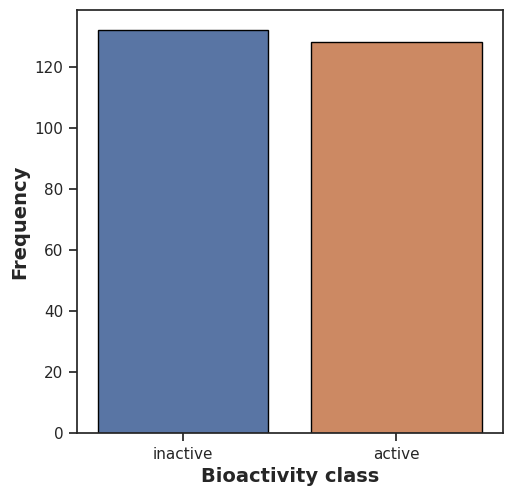

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, hue='class', edgecolor='black')
#hue allowed me to change the colour on thte basis of the bioactivity class
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

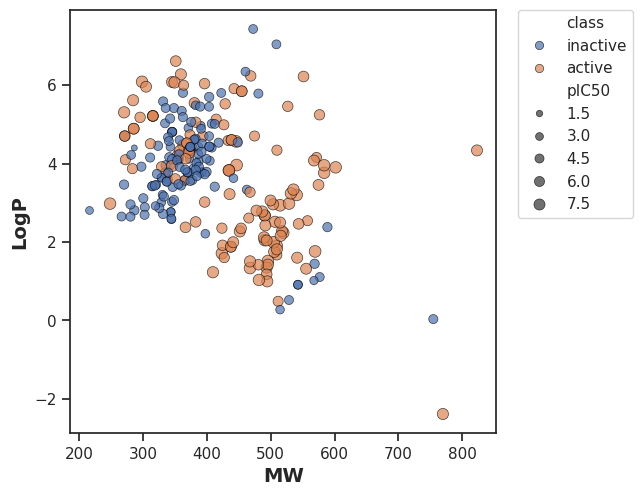

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

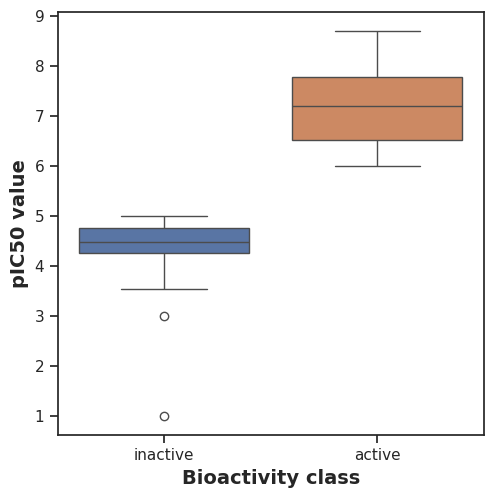

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [61]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

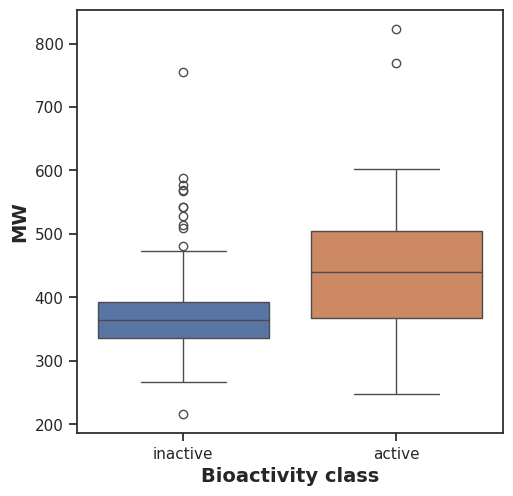

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [63]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,12094.5,1.804645e-09,0.05,Different distribution (reject H0)


#### **LogP**

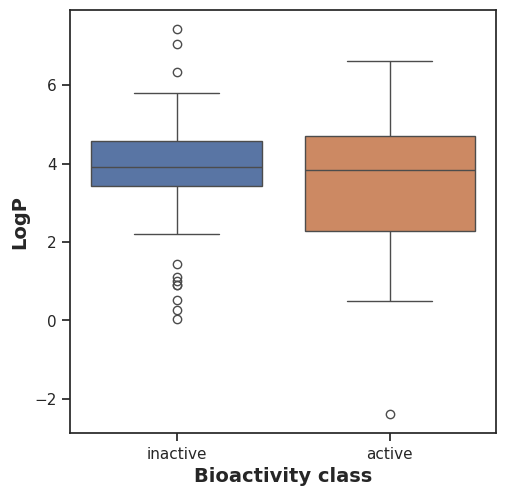

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [65]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,7483.5,0.111784,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

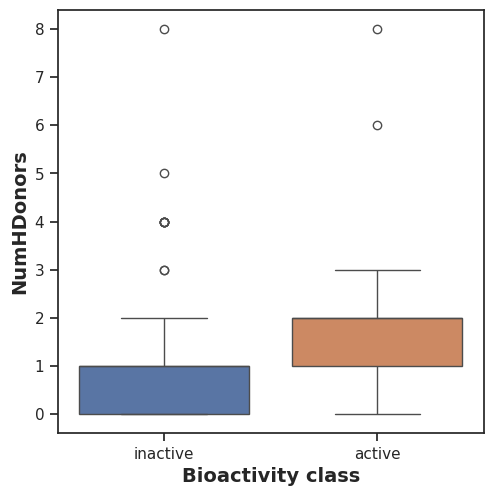

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [67]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,12614.5,3.943311e-13,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

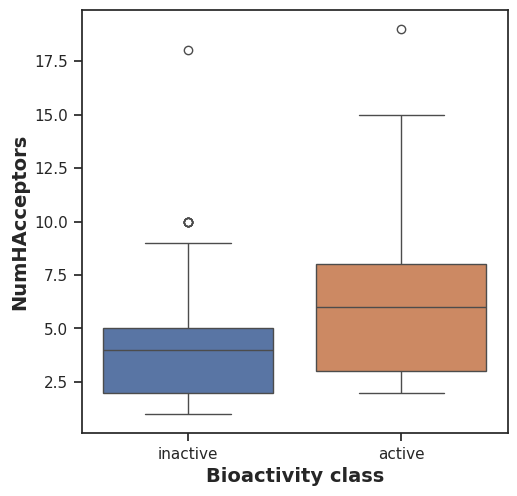

In [68]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, hue = 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [69]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,11201.0,0.000004,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

 Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) only LogP exhibited ***no statistical significance*** and therefore **no difference between the actives and inactives** . Meanwhile the other three descriptors seem to display ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [70]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 36%)
